<a href="https://colab.research.google.com/github/SilverFoxMedia-Tesis/IA_01/blob/main/Algoritmo_Regresion_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score

In [53]:
# Diccionarios de asignación de pesos
estadoxvalores = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": -1,
    "Overweight_Level_II": -2,
    "Obesity_Type_I": -3,
    "Obesity_Type_II": -4,
    "Obesity_Type_III": -5,
}
FAFxvalores = {
    3: 1,
    2: 0,
    1: -1,
    0: -2,
}
TUExvalores = {
    0: 0,
    1: -1,
    2: -2,
}
MTRANSxvalores = {
    "Bike": 2,
    "Walking": 1,
    "Public_Transportation": 0,
    "Motorbike": -1,
    "Automobile": -2,
}

In [54]:
# Lectura de datos
data = pd.read_csv('/ObesityDataSet_raw_and_data_sinthetic.csv')

# Tomar los primeros 1000 datos como conjunto de entrenamiento
train = data.iloc[:1000]

# Tomar los últimos 1000 datos como conjunto de prueba
test = data.iloc[-1000:]

In [55]:
# Asigna pesos a las variables y crea nuevas columnas
train['Puntos_Nivel'] = train['MTRANS'].map(MTRANSxvalores) + train['NObeyesdad'].map(estadoxvalores) + train['TUE'].apply(lambda x: TUExvalores.get(int(x), 0)) + train['FAF'].apply(lambda x: FAFxvalores.get(int(x), 2))

def encontrar_nivel(puntos_nivel):
    if -11 <= puntos_nivel <= -7:
        return "Beginner"
    elif -6 <= puntos_nivel <= -2:
        return "Intermediate"
    elif -1 <= puntos_nivel <= 3:
        return "Expert"
    else:
        return "Desconocido"

train['Nivel'] = train['Puntos_Nivel'].apply(encontrar_nivel)

<ipython-input-55-c7a4ebb7f47d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Puntos_Nivel'] = train['MTRANS'].map(MTRANSxvalores) + train['NObeyesdad'].map(estadoxvalores) + train['TUE'].apply(lambda x: TUExvalores.get(int(x), 0)) + train['FAF'].apply(lambda x: FAFxvalores.get(int(x), 2))
<ipython-input-55-c7a4ebb7f47d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Nivel'] = train['Puntos_Nivel'].apply(encontrar_nivel)


In [56]:
# Selección de columnas relevantes (tanto numéricas como categóricas)
columnas_numericas = ['TUE', 'FAF']
columnas_categoricas = ['MTRANS', 'NObeyesdad']

# Codificación one-hot para las columnas categóricas
train_encoded = pd.get_dummies(train[columnas_categoricas], columns=columnas_categoricas)

# Convertir FAF y TUE en enteros
train['FAF'] = train['FAF'].astype(int)
train['TUE'] = train['TUE'].astype(int)

<ipython-input-56-37640b2c53a1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FAF'] = train['FAF'].astype(int)
<ipython-input-56-37640b2c53a1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TUE'] = train['TUE'].astype(int)


In [57]:
# Concatenar las columnas numéricas y categóricas codificadas
X_train = pd.concat([train_encoded, train[columnas_numericas]], axis=1)

In [58]:
# Variable objetivo
y = train['Puntos_Nivel']

# Seleccionar un subconjunto de 500 filas
train_subset = X_train.sample(n=500, random_state=42)
y_subset = y[train_subset.index]

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_subset, y_subset, test_size=0.2, random_state=42)

In [59]:
# Creación del modelo de regresión Lasso
lasso = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario

# Entrenamiento del modelo
lasso.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = lasso.predict(X_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [60]:
# Cálculo de la exactitud y precisión para problemas de clasificación
y_pred_classification = [encontrar_nivel(p) for p in y_pred]
y_test_classification = [encontrar_nivel(p) for p in y_test]
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Muestra de metricas de machine learning
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-cuadrado: {r2}")
print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")

Mean Squared Error: 3.1821249999999996
Mean Absolute Error: 1.3805
R-cuadrado: -0.006651165733447151
Exactitud: 0.77
Precisión: 0.5929


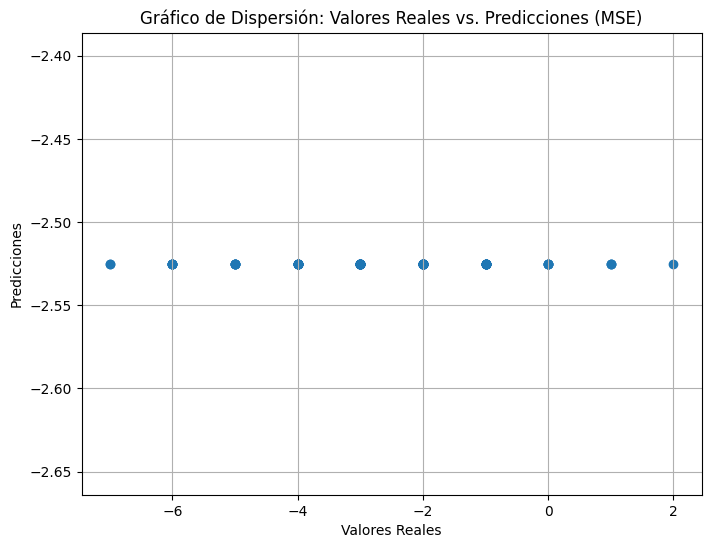

In [65]:
# Gráfico de dispersión para comparar predicciones con valores reales (MSE)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones (MSE)")
plt.grid(True)
plt.show()

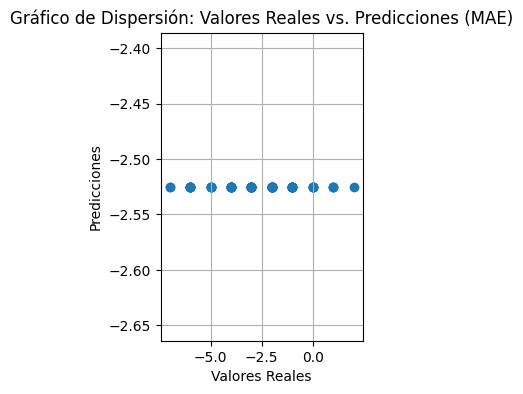

In [66]:
# Gráficos similares al de MSE para MAE, R^2, Exactitud y Precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones (MAE)")
plt.grid(True)
plt.show()

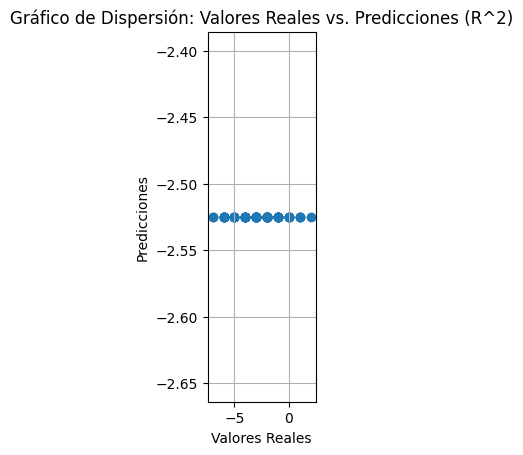

In [67]:
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones (R^2)")
plt.grid(True)
plt.show()

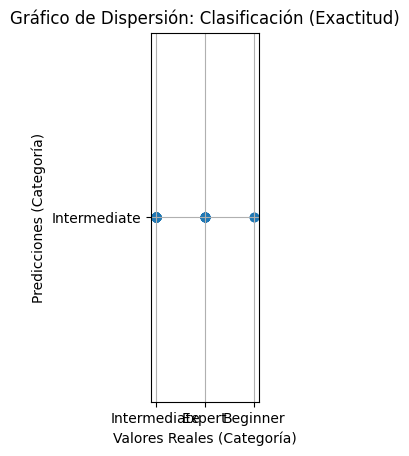

In [68]:
plt.subplot(1, 4, 3)
plt.scatter(y_test_classification, y_pred_classification)
plt.xlabel("Valores Reales (Categoría)")
plt.ylabel("Predicciones (Categoría)")
plt.title("Gráfico de Dispersión: Clasificación (Exactitud)")
plt.grid(True)
plt.show()

In [ ]:
plt.subplot(1, 4, 4)
plt.scatter(y_test_classification, y_pred_classification)
plt.xlabel("Valores Reales (Categoría)")
plt.ylabel("Predicciones (Categoría)")
plt.title("Gráfico de Dispersión: Clasificación (Precisión)")
plt.grid(True)
plt.show()